<a href="https://colab.research.google.com/github/su-sumico/seminar/blob/main/bert_ldnews_classification_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

livedoor ニュース記事データセットによる文章分類モデルの学習

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# !mkdir -p '/content/drive/My Drive/bert/'
%cd '/content/drive/My Drive/bert/'

!git clone https://github.com/huggingface/transformers
%cd transformers

Mounted at /content/drive
/content/drive/My Drive/bert
fatal: destination path 'transformers' already exists and is not an empty directory.
/content/drive/My Drive/bert/transformers


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers fugashi ipadic sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 84.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=1355

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import TrainingArguments
from transformers import Trainer
from datasets import Dataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# livedoorニュースコーパスのダウンロード
# !wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz
# !tar zxvf ldcc-20140209.tar.gz

In [ ]:
#import os
#import pandas as pd

# タイトルリストの取得
#def get_title_list(path):
    #title_list = []
    #filenames = os.listdir(path)
    #for filename in filenames:
        # ファイルの読み込み
        #with open(path+filename) as f:
            #title = f.readlines()[2].strip()
            #title_list.append(title)
    #return title_list

# データセットの生成（各ニュース記事のタイトルを取得）
#df = pd.DataFrame(columns=['label', 'sentence'])

#0
#title_list = get_title_list('text/dokujo-tsushin/')
#for title in title_list:
    #df = df.append({'label':0 , 'sentence':title}, ignore_index=True)

#1
#title_list = get_title_list('text/it-life-hack/')
#for title in title_list:
    #df = df.append({'label':1 , 'sentence':title}, ignore_index=True)

#2
#title_list = get_title_list('text/sports-watch/')
#for title in title_list:
   #df = df.append({'label':2 , 'sentence':title}, ignore_index=True)

#3
#title_list = get_title_list('text/kaden-channel/')
#for title in title_list:
   #df = df.append({'label':3 , 'sentence':title}, ignore_index=True)

#4
#title_list = get_title_list('text/livedoor-homme/')
#for title in title_list:
   #df = df.append({'label':4 , 'sentence':title}, ignore_index=True)
#5
#title_list = get_title_list('text/movie-enter/')
#for title in title_list:
   #df = df.append({'label':5 , 'sentence':title}, ignore_index=True)

#6
#title_list = get_title_list('text/peachy/')
#for title in title_list:
   #df = df.append({'label':6 , 'sentence':title}, ignore_index=True)

#7
#title_list = get_title_list('text/smax/')
#for title in title_list:
   #df = df.append({'label':7 , 'sentence':title}, ignore_index=True)

#8
#title_list = get_title_list('text/topic-news/')
#for title in title_list:
   #df = df.append({'label':8 , 'sentence':title}, ignore_index=True)

# データをシャッフルする
#df = df.sample(frac=1)

# 上記で取得したデータを学習用と検証用に分割する
#num = len(df)
#df[:int(num*0.7)].to_csv('./text/news_train.csv', sep=',', index=False)
#df[int(num*0.7):int(num*0.9)].to_csv('./text/news_val.csv', sep=',', index=False)
#df[int(num*0.9):].to_csv('./text/news_test.csv', sep=',', index=False)

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/bert/text/news_train.csv",encoding='cp932')
validation_df = pd.read_csv("/content/drive/MyDrive/bert/text/news_val.csv",encoding='cp932')

train_dataset = Dataset.from_pandas(train_df)
validation_dataset = Dataset.from_pandas(validation_df)

from datasets import DatasetDict
dataset = DatasetDict({
    "train": train_dataset,
    "validation": validation_dataset,
})

In [ ]:
train_df

,label,sentence
0,5,【プレゼント】戦乱に埋もれた驚きの大逆転の実話を描く！映画『のぼうの城』ジャパンプレミアにご招待
1,7,NTTドコモ、REGZA Phone T-01DおよびDisney Mobile on do...
2,1,ついに発売日が決定！有機ELスマートフォン「DELL Streak Pro 101DL」が凄い
3,5,【編集部的映画批評】フランスで起こった人種差別を斬る
4,5,顔に十字架の刺青をもつ、人類史上最強の聖職者
...,...,...
5158,3,ギミックなしの実力派！ 空気清浄機 ブルーエア 270E【売れ筋チェック】
5159,3,ユーザーの不満爆発でレビューを閉鎖！楽天の電子書籍端末「kobo」は大丈夫か？【話題】
5160,0,『子供が欲しくない』という女性に共感できますか？
5161,2,ザック・ジャパンの″秘密兵器″報道に賛否


In [ ]:
# トークナイザの取得
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-whole-word-masking")

# モデルの取得
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 9
model = (AutoModelForSequenceClassification
    .from_pretrained("cl-tohoku/bert-base-japanese-whole-word-masking", num_labels=num_labels)
    .to(device))

# トークナイザ処理
def tokenize(batch):
    return tokenizer(batch["sentence"], padding=True, truncation=True)
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

# 学習の準備
batch_size = 16
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"classification"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=False,
    log_level="error",
)

# 評価指標の定義
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

# 学習
trainer = Trainer(
    model=model, args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=dataset_encoded["train"],
    eval_dataset=dataset_encoded["validation"],
    tokenizer=tokenizer
)
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5163 [00:00<?, ? examples/s]

Map:   0%|          | 0/1475 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.018100,0.529017,0.825763,0.824205
2,0.384100,0.427684,0.856949,0.855709


TrainOutput(global_step=646, training_loss=0.7000348914887514, metrics={'train_runtime': 207.6266, 'train_samples_per_second': 49.734, 'train_steps_per_second': 3.111, 'total_flos': 371472433599960.0, 'train_loss': 0.7000348914887514, 'epoch': 2.0})

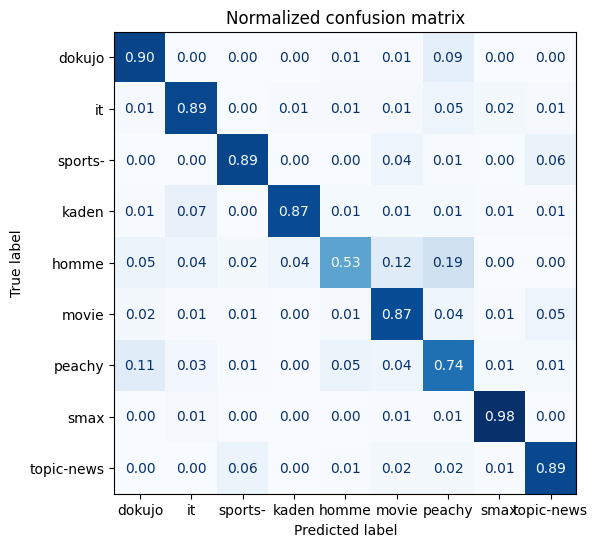

In [ ]:
preds_output = trainer.predict(dataset_encoded["validation"])

y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(dataset_encoded["validation"]["label"])
labels =['dokujo', 'it', 'sports-','kaden','homme','movie','peachy','smax','topic-news']

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid,labels)

In [ ]:
trainer.save_model('/content/drive/MyDrive/bert/text/news_model')